# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [65]:
import pandas as pd
import numpy as np

boston = pd.read_csv('../data/boston_data.csv')

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [66]:
boston.isna().sum()

# no null values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

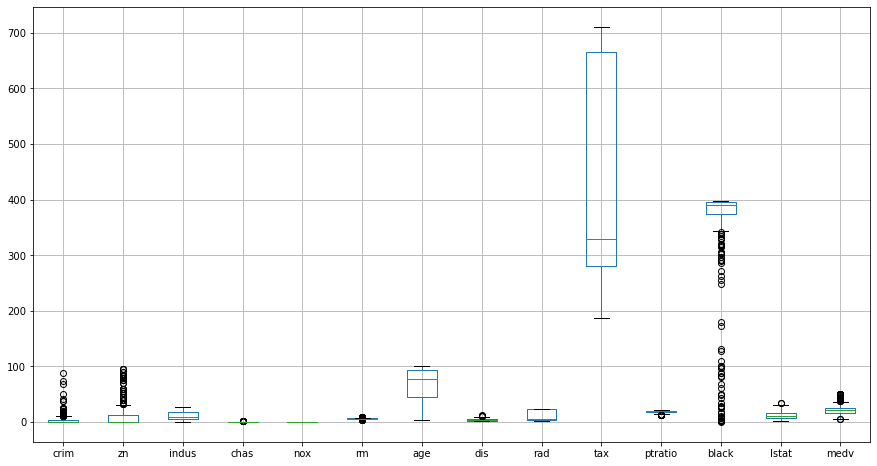

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

boston.boxplot(figsize=(15,8))
plt.show()

In [68]:
def outliers(df, col):
    '''
    This function will receive a dataframe
    calculate the IQR
    return only the rows that are not outliers
    '''
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + IQR * 1.5
    lower = df[col].quantile(0.25) - IQR * 1.5
    data_filtered = df[(df[col] <= upper) & (df[col] >= lower)]
    print(len(data_filtered))
    return data_filtered

# Some of the columns are very skewed, but there aren't many points that are very far off, so I'll keep everything for now

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

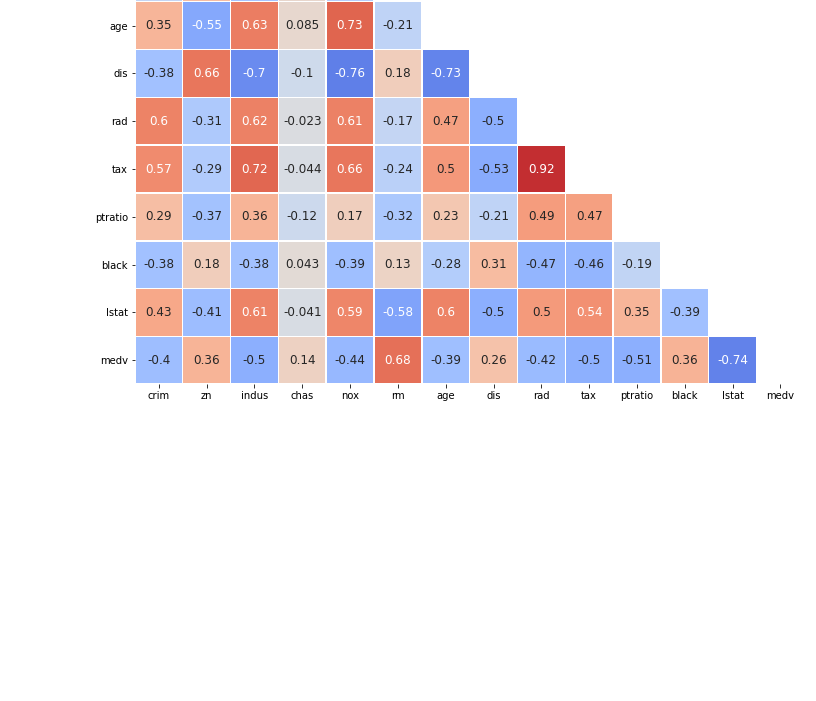

In [69]:
corr_matrix = boston.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 18))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

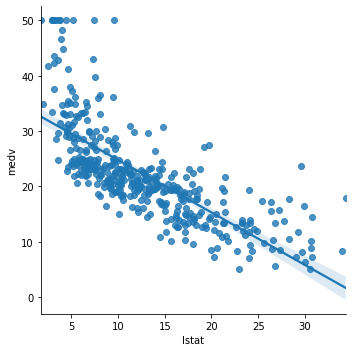

In [70]:
sns.lmplot(x='lstat',y='medv',data=boston,fit_reg=True) 

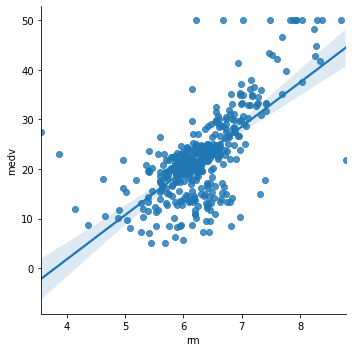

In [71]:
sns.lmplot(x='rm',y='medv',data=boston,fit_reg=True) 

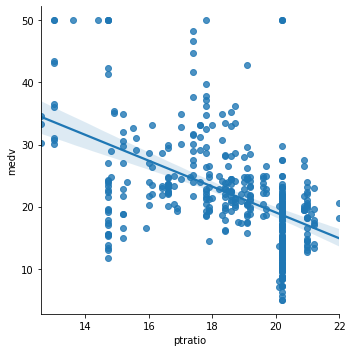

In [72]:
sns.lmplot(x='ptratio',y='medv',data=boston,fit_reg=True) 

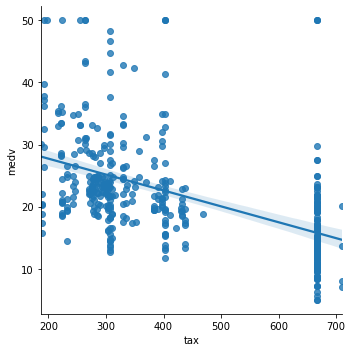

In [73]:
sns.lmplot(x='tax',y='medv',data=boston,fit_reg=True) 

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [74]:
# The rm has a positive correlation with the target while lstat, ptratio and tax have a negative correlation
# At least for the tax I would expect it to be a positive correlation

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [75]:
# Done above

# chas and dis have low correlation

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [76]:
boston['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [77]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    from sklearn.metrics import r2_score

    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [78]:
from sklearn.model_selection import train_test_split

df = boston.sample(frac=1)

X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [80]:
# Five separate RFR here with the given max depths
max_depth = [2,4,6,8,10]

from sklearn.ensemble import RandomForestRegressor

train_score = []
test_score = []
for dep in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=dep, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    train_score.append(performance_metric(y_train, model.predict(X_train)))
    test_score.append(performance_metric(y_test, model.predict(X_test)))
    
print(train_score)
print(test_score)

[0.7909198961293349, 0.9099376128642828, 0.9460553922375152, 0.9592680971677984, 0.9637509520054987]
[0.7391780013659297, 0.7881393651255325, 0.8028933095523528, 0.8125675393780384, 0.8110814400027325]


Now, plot the score for each tree on the training set and on the testing set.

<AxesSubplot:xlabel='max_depth'>

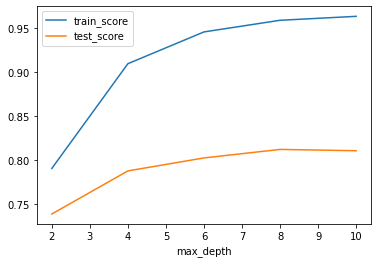

In [81]:
# Produce a plot with the score for the testing and training for the different max depths
d = {'max_depth':max_depth, 'train_score':train_score, 'test_score':test_score}
df = pd.DataFrame.from_dict(d)
df.plot.line(x='max_depth')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [60]:
# Your response here

# The bigger the max_depth the easier it is for the model to overfit the data

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[0.6157281945605413, 0.9637509520054987]
[0.5829873810209376, 0.8110814400027325]


<AxesSubplot:xlabel='max_depth'>

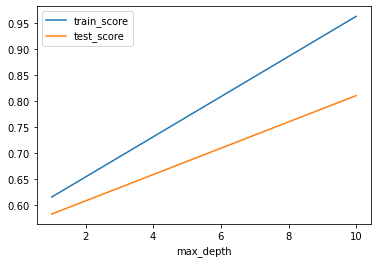

In [82]:
max_depth = [1,10]

from sklearn.ensemble import RandomForestRegressor

train_score = []
test_score = []
for dep in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=dep, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    train_score.append(performance_metric(y_train, model.predict(X_train)))
    test_score.append(performance_metric(y_test, model.predict(X_test)))
    
print(train_score)
print(test_score)

d = {'max_depth':max_depth, 'train_score':train_score, 'test_score':test_score}
df = pd.DataFrame.from_dict(d)
df.plot.line(x='max_depth')

# Your response here
# The model with depth=1 has high bias
# The model with depth=10 has high variance


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

[0.6157281945605413, 0.7909198961293349, 0.8727050388067474, 0.9099376128642827, 0.9312990003887965]
[0.5829873810209374, 0.7391780013659297, 0.7499858670849457, 0.7881393651255325, 0.8065376363013077]


<AxesSubplot:xlabel='max_depth'>

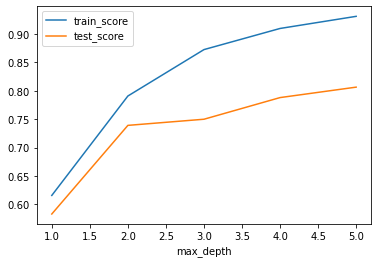

In [84]:
max_depth = [1,2,3,4,5]

from sklearn.ensemble import RandomForestRegressor

train_score = []
test_score = []
for dep in max_depth:
    model = RandomForestRegressor(n_estimators=10, max_depth=dep, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    train_score.append(performance_metric(y_train, model.predict(X_train)))
    test_score.append(performance_metric(y_test, model.predict(X_test)))
    
print(train_score)
print(test_score)

d = {'max_depth':max_depth, 'train_score':train_score, 'test_score':test_score}
df = pd.DataFrame.from_dict(d)
df.plot.line(x='max_depth')

# Your response here
# Depth = 2 gives the best model. 
#More than that and it overfits the training data, which should give worse results in future data

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [64]:
# Your response here

# Data from that far back in time (1978) is mostly irrelevant

# No.

# No, it needs more data to train so that is becomes more consistent

# No.